In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw
import numpy as np
from IPython.display import display,Image
import pandas as pd
from rdkit.Chem import PandasTools

In [2]:
import pubchempy as pcp

In [13]:

compounds = []
per_page = 10**1
for smiles in ["N=N=N", "NN#N",]:
    for i in range(2):
        try:
            a = pcp.get_properties(
              properties="CanonicalSMILES", 
              identifier=smiles, namespace="smiles", 
              searchtype="substructure",
              RingsNotEmbedded=True,
              listkey_count=per_page, listkey_start=i*per_page,
                as_dataframe=True,
            )
        except:
            pass
        print("Retrieved page {} of {} search".format(i+1, smiles))
        compounds.append(a)

Retrieved page 1 of N=N=N search
Retrieved page 2 of N=N=N search
Retrieved page 1 of NN#N search
Retrieved page 2 of NN#N search


In [3]:
help(pcp.get_properties)

Help on function get_properties in module pubchempy:

get_properties(properties, identifier, namespace='cid', searchtype=None, as_dataframe=False, **kwargs)
    Retrieve the specified properties from PubChem.
    
    :param identifier: The compound, substance or assay identifier to use as a search query.
    :param namespace: (optional) The identifier type.
    :param searchtype: (optional) The advanced search type, one of substructure, superstructure or similarity.
    :param as_dataframe: (optional) Automatically extract the properties into a pandas :class:`~pandas.DataFrame`.



In [32]:
from rdkit.Chem.Draw import rdMolDraw2D
result = pd.concat(compounds)
pics = []
mols = []
for s in result['CanonicalSMILES'].values:
    mols.append( Chem.MolFromSmiles(s))
    
    #d = rdMolDraw2D.MolDraw2DCairo(250,250)
    #pics.append(d.DrawMolecule(m))
            

In [37]:
PandasTools.AddMoleculeColumnToFrame(result, smilesCol='CanonicalSMILES', molCol= 'Mols')

CanonicalSMILES  \
CID                                                            
151589171                 C(CS(=O)(=O)S(=O)(=O)N=[N+]=[N-])N   
166611824  CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=...   
166609774  C1CCC(CC1)(C2=CC=C(C=C2)Cl)C(=O)N(CCOCCOCCN=[N...   
78092327   C1C(C(C(OC1(C(=O)O)O)C(C(CO)O)O)NC(=O)CN=[N+]=...   
74319349   CC(=O)NC1C(CC(OC1C(C(CN=[N+]=[N-])O)O)(C(=O)O)O)O   
166606843  CCN1C(C2=C(C=CC(=C2)N)C3=C1C=C(C=C3)N=[N+]=[N-...   
166604512                    CCC1CCCCN1C(=O)C(CC)N=[N+]=[N-]   
166604509                 CC1=NN2C=C(C=NC2=C1)CCCN=[N+]=[N-]   
166604508                 C1=CN=CC=C1C2=CSC(=N2)CN=[N+]=[N-]   
166604496          CC(C)(C)OC(=O)N1CC(=C(C1=O)F)CN=[N+]=[N-]   
166604444  CCCCCCCCCCCCCCCCCC(=O)OCC(COP(=O)(O)OCCNC(=O)O...   
166604405  C(C1C2C(C(C(O1)OC3C(OC(C(C3O)O)OC4C(OC(C(C4O)O...   
166604338  CC(COC1C(C(C(C(O1)COC(=O)C)OC(=O)C)OC(=O)C)OC(...   
166604337  C1=CC(=C(C=C1N=[N+]=[N-])S(=O)(=O)[O-])C=CC2=C...   
166604228              C(COCCOCCOCCOCCN=[N+]=[N-])C(=O)NN.Cl   
166604227  C1C(C(=O)N(C1=O)OC(=O)CCCCCNC(=O)C2=C(C=CC(=C2...   
166604226  C1C(C(=O)N(C1=O)OC(=O)CCN=[N+]=[N-])S(=O)(=O)[...   
166604060                     C1=CSC(=C1)C(CN=[N+]=[N-])(F)F   
166604005                    C1C(C(C(=O)N1)(F)F)CN=[N+]=[N-]   
166597118                 COC(=O)C(=CC1=CC=CC=N1)N=[N+]=[N-]   
33557                                   [N-]=[N+]=[N-].[Na+]   
62728                   [N-]=[N+]=[N-].[N-]=[N+]=[N-].[Ba+2]   
10290740                                 [N-]=[N+]=[N-].[K+]   
89824                                   [N-]=[N+]=[N-].[Rb+]   
33558                                         [N-]=[N+]=[N-]   
24745345                [N-]=[N+]=[N-].[N-]=[N+]=[N-].[Cu+2]   
5743232              CCCC[N+](CCCC)(CCCC)CCCC.[N-]=[N+]=[N-]   
89817                                   [N-]=[N+]=[N-].[Cs+]   
23623736                [N-]=[N+]=[N-].[N-]=[N+]=[N-].[Pb+2]   
20313255                               [N-]=[N+]=[N-].[Hg+2]   
61698                                   [N-]=[N+]=[N-].[Ag+]   
11728342            CCN(CC)P(=N[N+]#N)(N(CC)CC)N(CC)CC.[Br-]   
5743369                                [N-]=[N+]=[N-].[Cu+2]   
4427778                                 [N-]=[N+]=[N-].[Na+]   
169921         C1=CC(=S=S=C2C=CC(=N[N+]#N)C=C2)C=CC1=NN=[N-]   
88163                                   [Li+].[N-]=[N+]=[N-]   
101359212         C1=C(C(=CC2=NC(=O)C(=O)N=C21)N(O)O)N[N+]#N   
90960324   C1(=C(C(=O)C(=N[N+]#N)C(=NN=[N-])C1=O)N=[N+]=[...   
57348354                [N-]=[N+]=[N-].[N-]=[N+]=[N-].[Cu+2]   
18385035                              [NH3+]N.[N-]=[N+]=[N-]   

                                                       Mols  
CID                                                          
151589171  <rdkit.Chem.rdchem.Mol object at 0x7fe83a4d3530>  
166611824  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9310>  
166609774  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f8dd0>  
78092327   <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9380>  
74319349   <rdkit.Chem.rdchem.Mol object at 0x7fe8398f93f0>  
166606843  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9540>  
166604512  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f95b0>  
166604509  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9620>  
166604508  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9700>  
166604496  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f97e0>  
166604444  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9850>  
166604405  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f98c0>  
166604338  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f99a0>  
166604337  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9a10>  
166604228  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9a80>  
166604227  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9af0>  
166604226  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9b60>  
166604060  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9d90>  
166604005  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f9e00>  
166597118  <rdkit.Chem.rdchem.Mol object at 0x7fe8398f
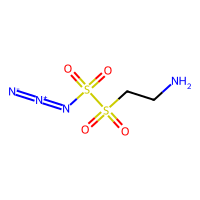
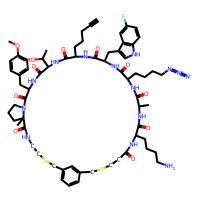
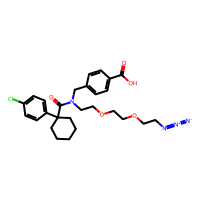
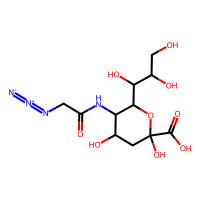
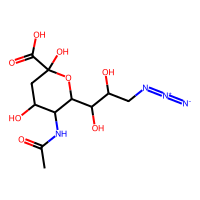
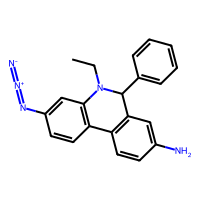
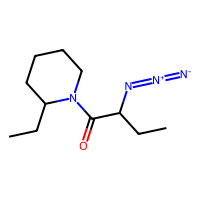
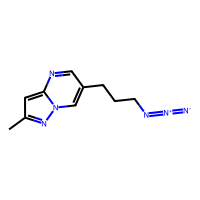
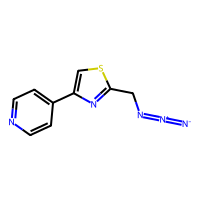
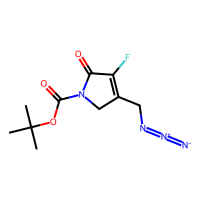
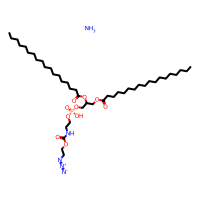
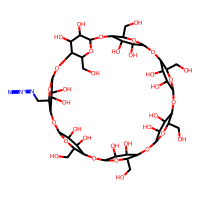
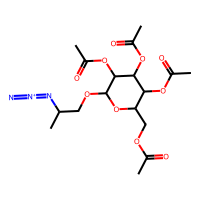
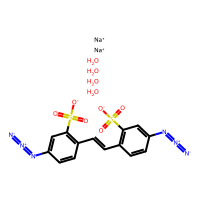
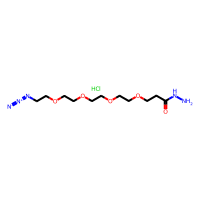
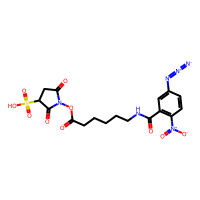
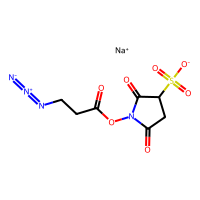
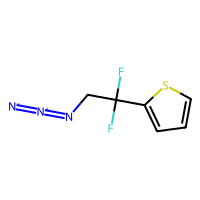
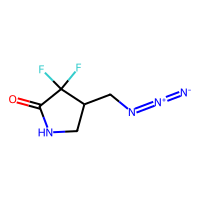
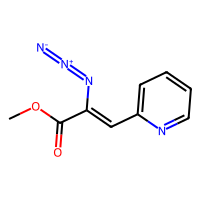
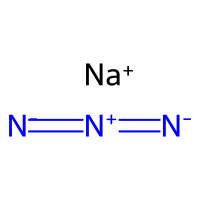
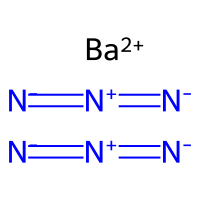
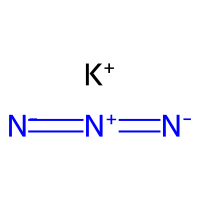
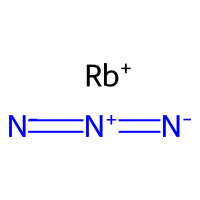
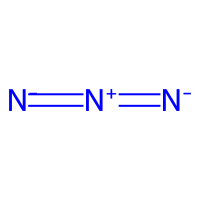
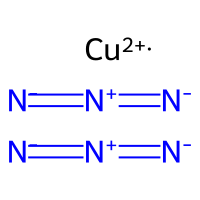
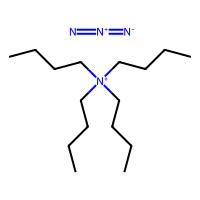
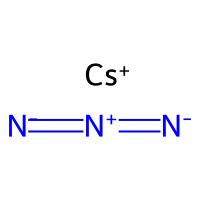
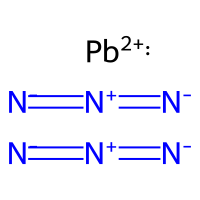
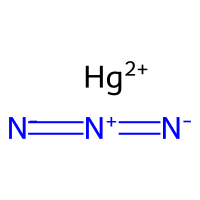
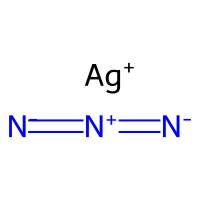
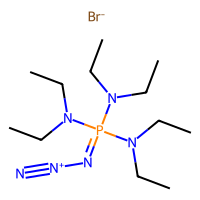
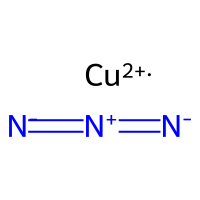
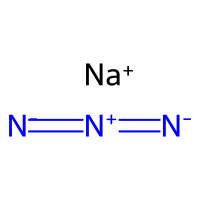
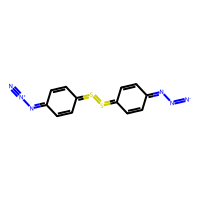
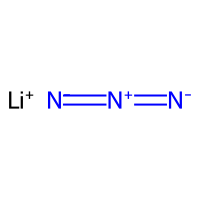
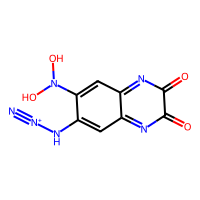
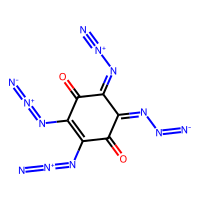
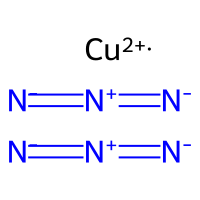
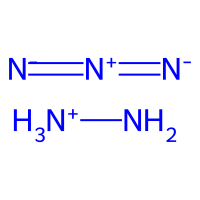

In [38]:
result

In [1]:
pwd

'/home/preps/golovin/public_html/ipynb'

In [1]:
import os
os.chdir('/tmp')

In [32]:
#! git clone https://github.com/pulimeng/eToxPred.git
! /opt/share/conda-envs/rdkit/bin/pip install joblib
! /opt/share/conda-envs/rdkit/bin/pip install scikit-learn==0.23.2


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 9.8 MB/s eta 0:00:00:00:010:01m
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [559 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match

In [2]:
os.chdir('eToxPred')

In [28]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV


Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountered parsing SMILES DB00014
Error encountere

In [29]:
df = pd.DataFrame(columns=['name', 'smiles', 'Tox-score', 'SAscore'])
# laod the data

smiles = [
'N[C@@H](Cc1cnc[nH]1)C(=O)O',
'C[S](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1O'
]
names = [0,1]

def make_fp (x):
    mol = Chem.MolFromSmiles(x)
    mol = Chem.AddHs(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
    fp_string = fp.ToBitString()
    return  np.array(list(fp_string),dtype=float)
    

X  = np.array([ make_fp(s) for s in smiles ]) 

#X, smiles_list, names = load_data(opt.datafile)
# load the saved model and make predictions
print('...loading models')
clf = joblib.load('./etoxpred_best_model.joblib')
#reg = SAscore()
print('...starts prediction')
for i in range(X.shape[0]):
    tox_score = clf.predict_proba(X[i,:].reshape((1,1024)))[:,1]
#    sa_score = reg(smiles_list[i])
    df.at[i, 'name'] = names[i]
    df.at[i, 'smiles'] = smiles_list[i]
    df.at[i, 'Tox-score'] = tox_score[0]
 #   df.at[i, 'SAscore'] = sa_score
print('...prediction done!')
df


...loading models


/home/preps/golovin/.local/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeClassifier from version 0.23.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]